In [11]:
#rotation with theta(teta)

In [12]:
import os#kütüphaneleri import ettik.
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def get_jpeg_files():#uzantısı .jpg olanları listeledik.
    os.getcwd()
    os.listdir
    path=os.getcwd()
    path=os.getcwd()
    jpg_files=[f for f in os.listdir(path) if f.endswith('.jpg')]
    return jpg_files
get_jpeg_files()

['deneme_1.jpg',
 'deneme_2.jpg',
 'penguins_1.jpg',
 'pic_1.jpg',
 'pic_2.jpg',
 'pic_3.jpg',
 'siyahbeyaz.jpg',
 'yeni.jpg',
 'yeni3.jpg']

In [14]:
def display_two_image(im_1,im_2):#iki imageyi yan yana görüntüleme fonksiyonu.
    plt.subplot(1,2,1)
    plt.imshow(im_1)
    
    plt.subplot(1,2,2)
    plt.imshow(im_2)
    
    plt.show()
def rotate_by_i_j_swap(im_1):#basit image rotate fonksiyonu.
    m,n,k=im_1.shape
    
    new_image=np.zeros((n,m,k),dtype='uint8')
    
    for i in range(m):
        for j in range(n):
            temp=im_1[i,j]
            new_image[j,i]=temp
            
    return new_image

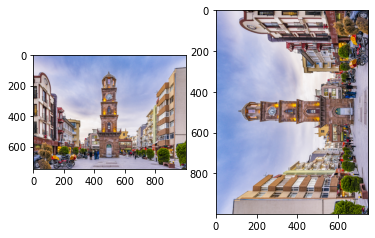

In [15]:
image_1=plt.imread('pic_3.jpg')
image_2=rotate_by_i_j_swap(image_1)#sadece bir rotate.
image_3=rotate_by_i_j_swap(image_2)#iki rotate yapınca image eski haline geliyor.
display_two_image(image_1,image_2)

In [16]:
def rotate_one_point_with_theta_counterclockwise(point,angle): #noktayı saat yönü tersinde döndürme
    #point=x-y değeri
    #bir noktayı theta(teta) kadar yer değiştir.
    theta=np.radians(angle)#dereceyi radyana çevirdik.
    
    r=np.array(( (np.cos(theta),-np.sin(theta)), #bu radyandan dönüşüm matrisini elde ettik
              (np.sin(theta),np.cos(theta)) ))
    
    v=np.array(point)#yukarıdan gelen noktayı np array'e dönüştürdük.
    
    return r.dot(v).astype(int) #r ve v yi çarpıyoruz.

def get_all_new_location(im_1,angle): #bütün değerler için uyguluyorum yukarıdakini.(yani tüm image için)
    m,n,k=im_1.shape
    new_location_points=[]
    for i in range(m):
        for j in range(n):
            new_location_points.append(rotate_one_point_with_theta_counterclockwise([i,j],angle))
            
    return new_location_points        

In [17]:
def get_min_max(new_location_points):# eksili yerleri gösteremeyeceğim için konumu değiştiriyorum.
    min_x,min_y=new_location_points[0][0],new_location_points[0][1]
    max_x,max_y=new_location_points[0][0],new_location_points[0][1]
    
    s1=len(new_location_points)
    for s in range(s1):
        if min_x>new_location_points[s][0]:
            min_x=new_location_points[s][0]
        if max_x<new_location_points[s][0]:
            max_x=new_location_points[s][0]
            
        if min_y>new_location_points[s][1]:
            min_y=new_location_points[s][1]
        if max_y<new_location_points[s][1]:
            max_y=new_location_points[s][1]
            
    return min_x,min_y,max_x,max_y         

In [18]:
new_location_points=get_all_new_location(image_1,90)
min_x,min_y,max_x,max_y=get_min_max(new_location_points)

rotate_one_point_with_theta_counterclockwise([0,1],90)#burda eksili değer olduğunu gördük.

array([-1,  0])

In [19]:
def rotate_an_image(im_1,angle):#en küçük koordinati 0-0'a getiren yeni değerleri bulduk vs.
    m,n,k=im_1.shape
    new_location_points=get_all_new_location(im_1,angle)
    
    min_x,min_y,max_x,max_y=get_min_max(new_location_points)
    
    new_m=max_x-min_x+1
    new_n=max_y-min_y+1
    
    x_offset=0-min_x
    y_offset=0-max_y
    
    new_image_2=np.zeros((new_m,new_n,3),dtype='uint8')
    
    for i in range(m):
        for j in range(n):
            new_i,new_j=rotate_one_point_with_theta_counterclockwise([i,j],angle)
            new_image_2[new_i+x_offset,new_j+y_offset]=image_1[i,j]
    return new_image_2

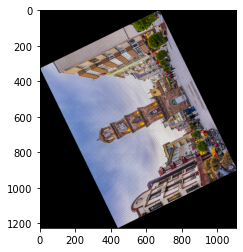

In [20]:
i_1=rotate_an_image(image_1,116)#saatin tersi yönde 116 derece döndür.
plt.imshow(i_1)
plt.show()

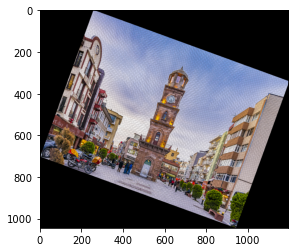

In [21]:
i_1=rotate_an_image(image_1,-20)#saat yönünde 20 derece döndür.
plt.imshow(i_1)
plt.show()